In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the given data
train = pd.read_csv('train_data.csv')

test = pd.read_csv('test_data.csv')
train.head()
# train.shape

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   object 
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   object 
 5   Transmission       3499 non-null   object 
 6   Owner_Type         3499 non-null   object 
 7   Mileage            3499 non-null   object 
 8   Engine             3477 non-null   object 
 9   Power              3477 non-null   object 
 10  Seats              3474 non-null   float64
 11  New_Price          481 non-null    object 
 12  Price              3499 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 355.5+ KB


In [4]:
print(round(train.isnull().mean() * 100, 2))
# print(round(test.isnull().mean() * 100, 2))



Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.00
Engine                0.63
Power                 0.63
Seats                 0.71
New_Price            86.25
Price                 0.00
dtype: float64


In [5]:
# Dropping Missing Values
train.dropna(subset = ['Mileage', 'Power', 'Mileage', 'Seats'], inplace=True)
train.drop(['New_Price'],axis=1, inplace=True)

# Dropping Missing Values
test.dropna(subset = ['Mileage', 'Power', 'Mileage', 'Seats'], inplace=True)
test.drop(['New_Price'],axis=1, inplace=True)

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64


In [7]:
# convert the data type of the column milage to string
Correct_Mileage= []
for i in train.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
#    for unit in str(i).split(" "):
#        print(type(unit))
#        if unit=='km/kg':
#            print('kmkg')
train['Mileage'] = Correct_Mileage

In [8]:
Correct_Mileage= []
for i in test.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
#    for unit in str(i).split(" "):
#        print(type(unit))
#        if unit=='km/kg':
#            print('kmkg')
test['Mileage'] = Correct_Mileage

In [9]:
# train['Mileage'] = train['Mileage'].str.replace('[^\d\.]', '')
# train['Mileage']
print(train[train['Power'] == 'null bhp'])
print(train[train['Engine'] == 'null CC'])
# replace the null bhp value with 0 
train['Power'] = train['Power'].str.replace('null bhp', '0')
# train['Power'] 


                                      Name   Location  Year  \
76                Ford Fiesta 1.4 SXi TDCi     Jaipur  2008   
79                  Hyundai Santro Xing XL  Hyderabad  2005   
89                  Hyundai Santro Xing XO  Hyderabad  2007   
120   Hyundai Santro Xing XL eRLX Euro III     Mumbai  2005   
143    Hyundai Santro Xing XO eRLX Euro II      Kochi  2008   
...                                    ...        ...   ...   
3104                 Maruti Swift VDI BSIV    Kolkata  2013   
3189  Hyundai Santro GS zipDrive - Euro II    Chennai  2002   
3247                       Toyota Etios GD    Chennai  2011   
3290              Ford Fiesta 1.4 SXi TDCi  Hyderabad  2008   
3439           Maruti Swift VDI BSIV W ABS       Pune  2010   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage   Engine  \
76               111111    Diesel       Manual      First     17.0  1399 CC   
79                87591    Petrol       Manual      First      0.0  1086 CC   
89    

In [10]:
print(train['Engine'])
print(train['Power'])

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
3494    1582 CC
3495     998 CC
3496    1248 CC
3497    1120 CC
3498    1248 CC
Name: Engine, Length: 3474, dtype: object
0        58.16 bhp
1        126.2 bhp
2         88.7 bhp
3        88.76 bhp
4        140.8 bhp
           ...    
3494    126.32 bhp
3495      67.1 bhp
3496      88.5 bhp
3497     71.01 bhp
3498        74 bhp
Name: Power, Length: 3474, dtype: object


In [11]:
# Remove the non-numeric characters and convert to float64
# train['Mileage'] = train['Mileage'].str.replace('[^\d\.]', '').astype('float64')
train['Engine'] = train['Engine'].astype(str).str.replace('[^\d\.]','' ).astype('float64')
train['Power'] = train['Power'].astype(str).str.replace('[^\d\.]', '').astype('float64')
# train['Power'] =  train['Power'].astype('float64')

C:\Users\Basava Chari\AppData\Local\Temp\ipykernel_6068\3749950498.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Engine'] = train['Engine'].astype(str).str.replace('[^\d\.]','' ).astype('float64')
C:\Users\Basava Chari\AppData\Local\Temp\ipykernel_6068\3749950498.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Power'] = train['Power'].astype(str).str.replace('[^\d\.]', '').astype('float64')


For test data set


In [12]:
print(test[test['Power'] == 'null bhp'])
print(test[test['Engine'] == 'null CC'])
# replace the null bhp value with 0 
test['Power'] = test['Power'].str.replace('null bhp', '0')

                                         Name    Location  Year  \
17              Hyundai Santro GLS I - Euro I        Pune  2011   
34                         Nissan Teana 230jM      Mumbai  2008   
90                            Tata Indica DLS   Hyderabad  2005   
129               Maruti Swift VDI BSIV W ABS  Coimbatore  2016   
139                          Honda CR-V Sport   Hyderabad  2010   
146                    Hyundai Santro Xing XP   Bangalore  2004   
170                    Hyundai Santro Xing XO   Hyderabad  2007   
234                         Maruti Esteem Vxi       Delhi  2005   
399                           Toyota Etios GD  Coimbatore  2013   
431               Maruti Swift VDI BSIV W ABS   Bangalore  2015   
500         Audi A4 3.2 FSI Tiptronic Quattro   Hyderabad  2012   
578                 Maruti Baleno LXI - BSIII       Kochi  2006   
581                      Toyota Etios Liva GD      Mumbai  2011   
852                     Maruti Esteem LX BSII      Jaipur  200

In [13]:
print(test['Power'].head())
print(test['Engine'].head())


0       140 bhp
1       190 bhp
2    138.03 bhp
3     88.73 bhp
4        82 bhp
Name: Power, dtype: object
0    2179 CC
1    1995 CC
2    1798 CC
3    1396 CC
4    1198 CC
Name: Engine, dtype: object


In [14]:
test['Engine'] = test['Engine'].astype(str).str.replace('[^\d\.]','' ).astype('float64')
test['Power'] = test['Power'].astype(str).str.replace('[^\d\.]', '').astype('float64')

C:\Users\Basava Chari\AppData\Local\Temp\ipykernel_6068\3799611965.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Engine'] = test['Engine'].astype(str).str.replace('[^\d\.]','' ).astype('float64')
C:\Users\Basava Chari\AppData\Local\Temp\ipykernel_6068\3799611965.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Power'] = test['Power'].astype(str).str.replace('[^\d\.]', '').astype('float64')


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 2519
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2501 non-null   object 
 1   Location           2501 non-null   object 
 2   Year               2501 non-null   int64  
 3   Kilometers_Driven  2501 non-null   int64  
 4   Fuel_Type          2501 non-null   object 
 5   Transmission       2501 non-null   object 
 6   Owner_Type         2501 non-null   object 
 7   Mileage            2501 non-null   float64
 8   Engine             2501 non-null   float64
 9   Power              2501 non-null   float64
 10  Seats              2501 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 234.5+ KB


In [16]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,17.74


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 2519
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2501 non-null   object 
 1   Location           2501 non-null   object 
 2   Year               2501 non-null   int64  
 3   Kilometers_Driven  2501 non-null   int64  
 4   Fuel_Type          2501 non-null   object 
 5   Transmission       2501 non-null   object 
 6   Owner_Type         2501 non-null   object 
 7   Mileage            2501 non-null   float64
 8   Engine             2501 non-null   float64
 9   Power              2501 non-null   float64
 10  Seats              2501 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 234.5+ KB


Now change the categorical value to numerical value using LabelEncoder


In [18]:
train['Location'].unique()
print(train['Year'].unique())
train['Fuel_Type'].unique()
train['Transmission'].unique()
train['Owner_Type'].unique()
# train['Name'].unique()

[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]


array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [21]:
# convert the categorical data into numerical data with the help of label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Location'] = le.fit_transform(train['Location'])
train['Fuel_Type'] = le.fit_transform(train['Fuel_Type'])
train['Transmission'] = le.fit_transform(train['Transmission'])
train['Owner_Type'] = le.fit_transform(train['Owner_Type'])
train['Year'] = le.fit_transform(train['Year'])

In [22]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,12,72000,0,1,0,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,17,41000,1,1,0,19.60,1582.0,126.20,5.0,12.50
2,Honda Jazz V,2,13,46000,3,1,0,18.00,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,2,14,87000,1,1,0,20.70,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,15,40670,1,0,2,15.00,1968.0,140.80,5.0,17.74


Name is the id of the data set so we can use it for the prediction
all other we can use them for prediction 
    

In [ ]:
train.drop(['Name'],axis=1, inplace=True)


In [27]:
train.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,12,72000,0,1,0,37.24,998.0,58.16,5.0,1.75
1,10,17,41000,1,1,0,19.60,1582.0,126.20,5.0,12.50
2,2,13,46000,3,1,0,18.00,1199.0,88.70,5.0,4.50
3,2,14,87000,1,1,0,20.70,1248.0,88.76,7.0,6.00
4,3,15,40670,1,0,2,15.00,1968.0,140.80,5.0,17.74


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(train[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']], train['Price'], test_size=0.2, random_state=0)


reg = LinearRegression().fit(x_train,y_train)

y_test_pred = reg.predict(x_test)
mean_squared_error(y_test, y_test_pred)

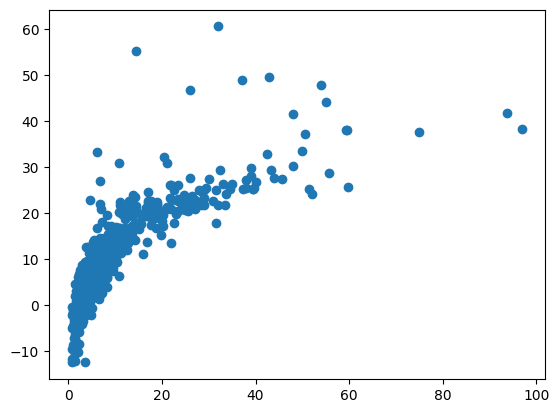

In [36]:
plt.plot(y_test, y_test_pred, 'o')